## 1. Setup

In [1]:
import os
from datetime import datetime  # For working with dates and times
import warnings  # For handling warning messages

import numpy as np  # Fundamental package for numerical computing
import pandas as pd  # Data manipulation and analysis library

from sklearn.preprocessing import MinMaxScaler # Data preprocessing
from sklearn.decomposition import PCA  # Principal Component Analysis for dimensionality reduction
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score  # Clustering evaluation metrics
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

import joblib  # For saving and loading machine learning models

import matplotlib.pyplot as plt  # Data visualization library
import seaborn as sns  # Data visualization with enhanced aesthetics

# Configure visualizations
sns.set_palette("Greens_d")  # Set color palette for seaborn visualizations
warnings.simplefilter("ignore")  # Ignore certain warning messages

# 2. Data load

In [2]:
class WebDataRetriever:
    """
    A class for retrieving data from a given URL.

    Parameters:
        url (str): The URL from which the data will be loaded.

    Attributes:
        url (str): The URL from which the data will be loaded.

    Example usage:
    ```
    URL = 'https://www.openml.org/data/get_csv/16826755/phpMYEkMl'
    data_retriever = WebDataRetriever(URL, DATASETS_DIR)
    result = data_retriever.retrieve_data()
    print(result)
    ```
    """

    DATASETS_DIR = './data/'  # Directory where data will be saved.
    RETRIEVED_DATA = 'retrieved_data.csv'  # File name for the retrieved data.

    def __init__(self, url, data_path, delimiter_url):
        self.url = url
        self.DATASETS_DIR = data_path
        self.delimiter_url = delimiter_url

    def retrieve_data(self):
        """
        Retrieves data from the specified URL, processes it, and stores it in a CSV file.

        Returns:
            str: A message indicating the location of the stored data.
        """
        # Loading data from specific URL
        data = pd.read_csv(self.url , delimiter = self.delimiter_url)

        # Create directory if it does not exist
        if not os.path.exists(self.DATASETS_DIR):
            os.makedirs(self.DATASETS_DIR)
            print(f"Directory '{self.DATASETS_DIR}' created successfully.")
        else:
            print(f"Directory '{self.DATASETS_DIR}' already exists.")

        # Save data to CSV file
        data.to_csv(self.DATASETS_DIR + self.RETRIEVED_DATA, index=False)
        


        return f'Data stored in {self.DATASETS_DIR + self.RETRIEVED_DATA}'

In [3]:
URL = 'https://raw.githubusercontent.com/juanchavezs/mlops_jpcs_proyectofinal/master/marketing_campaign.csv'
DELIMITER = '\t'
data_retriever = WebDataRetriever(url= URL, delimiter_url= DELIMITER , data_path= './data/')
result = data_retriever.retrieve_data()
print(result)

Directory './data/' created successfully.
Data stored in ./data/retrieved_data.csv


In [4]:
df = pd.read_csv('./data/retrieved_data.csv')

# 3. Data exploration

In [5]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
print('La cantidad de valores nulos son: ')
print( sum(df.isnull().sum()) )

df.isnull().sum()
## income has null values

La cantidad de valores nulos son: 
24


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Basic data cleaning for visualisation

In [9]:
print('La cantidad de valores duplicados son: ')
print( df.duplicated().sum() )

La cantidad de valores duplicados son: 
0


In [10]:
df.dropna(inplace = True)

#Calculating age by year of birth since age is useful in classification
df["Year_Birth"] = 2023-df["Year_Birth"]
df.rename(columns = {'Year_Birth':'Age'},inplace = True)

#Combining all amount spent in entire 2 years
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [11]:
df.drop(['Z_CostContact','Z_Revenue','ID','Dt_Customer',],axis = 1,inplace = True)
df = pd.get_dummies(df)

In [12]:
df.head(3)

,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,66,58138.0,0,0,58,635,88,546,172,88,...,False,False,False,False,False,False,True,False,False,False
1,69,46344.0,1,1,38,11,1,6,2,1,...,False,False,False,False,False,False,True,False,False,False
2,58,71613.0,0,0,26,426,49,127,111,21,...,False,False,False,False,False,False,False,True,False,False


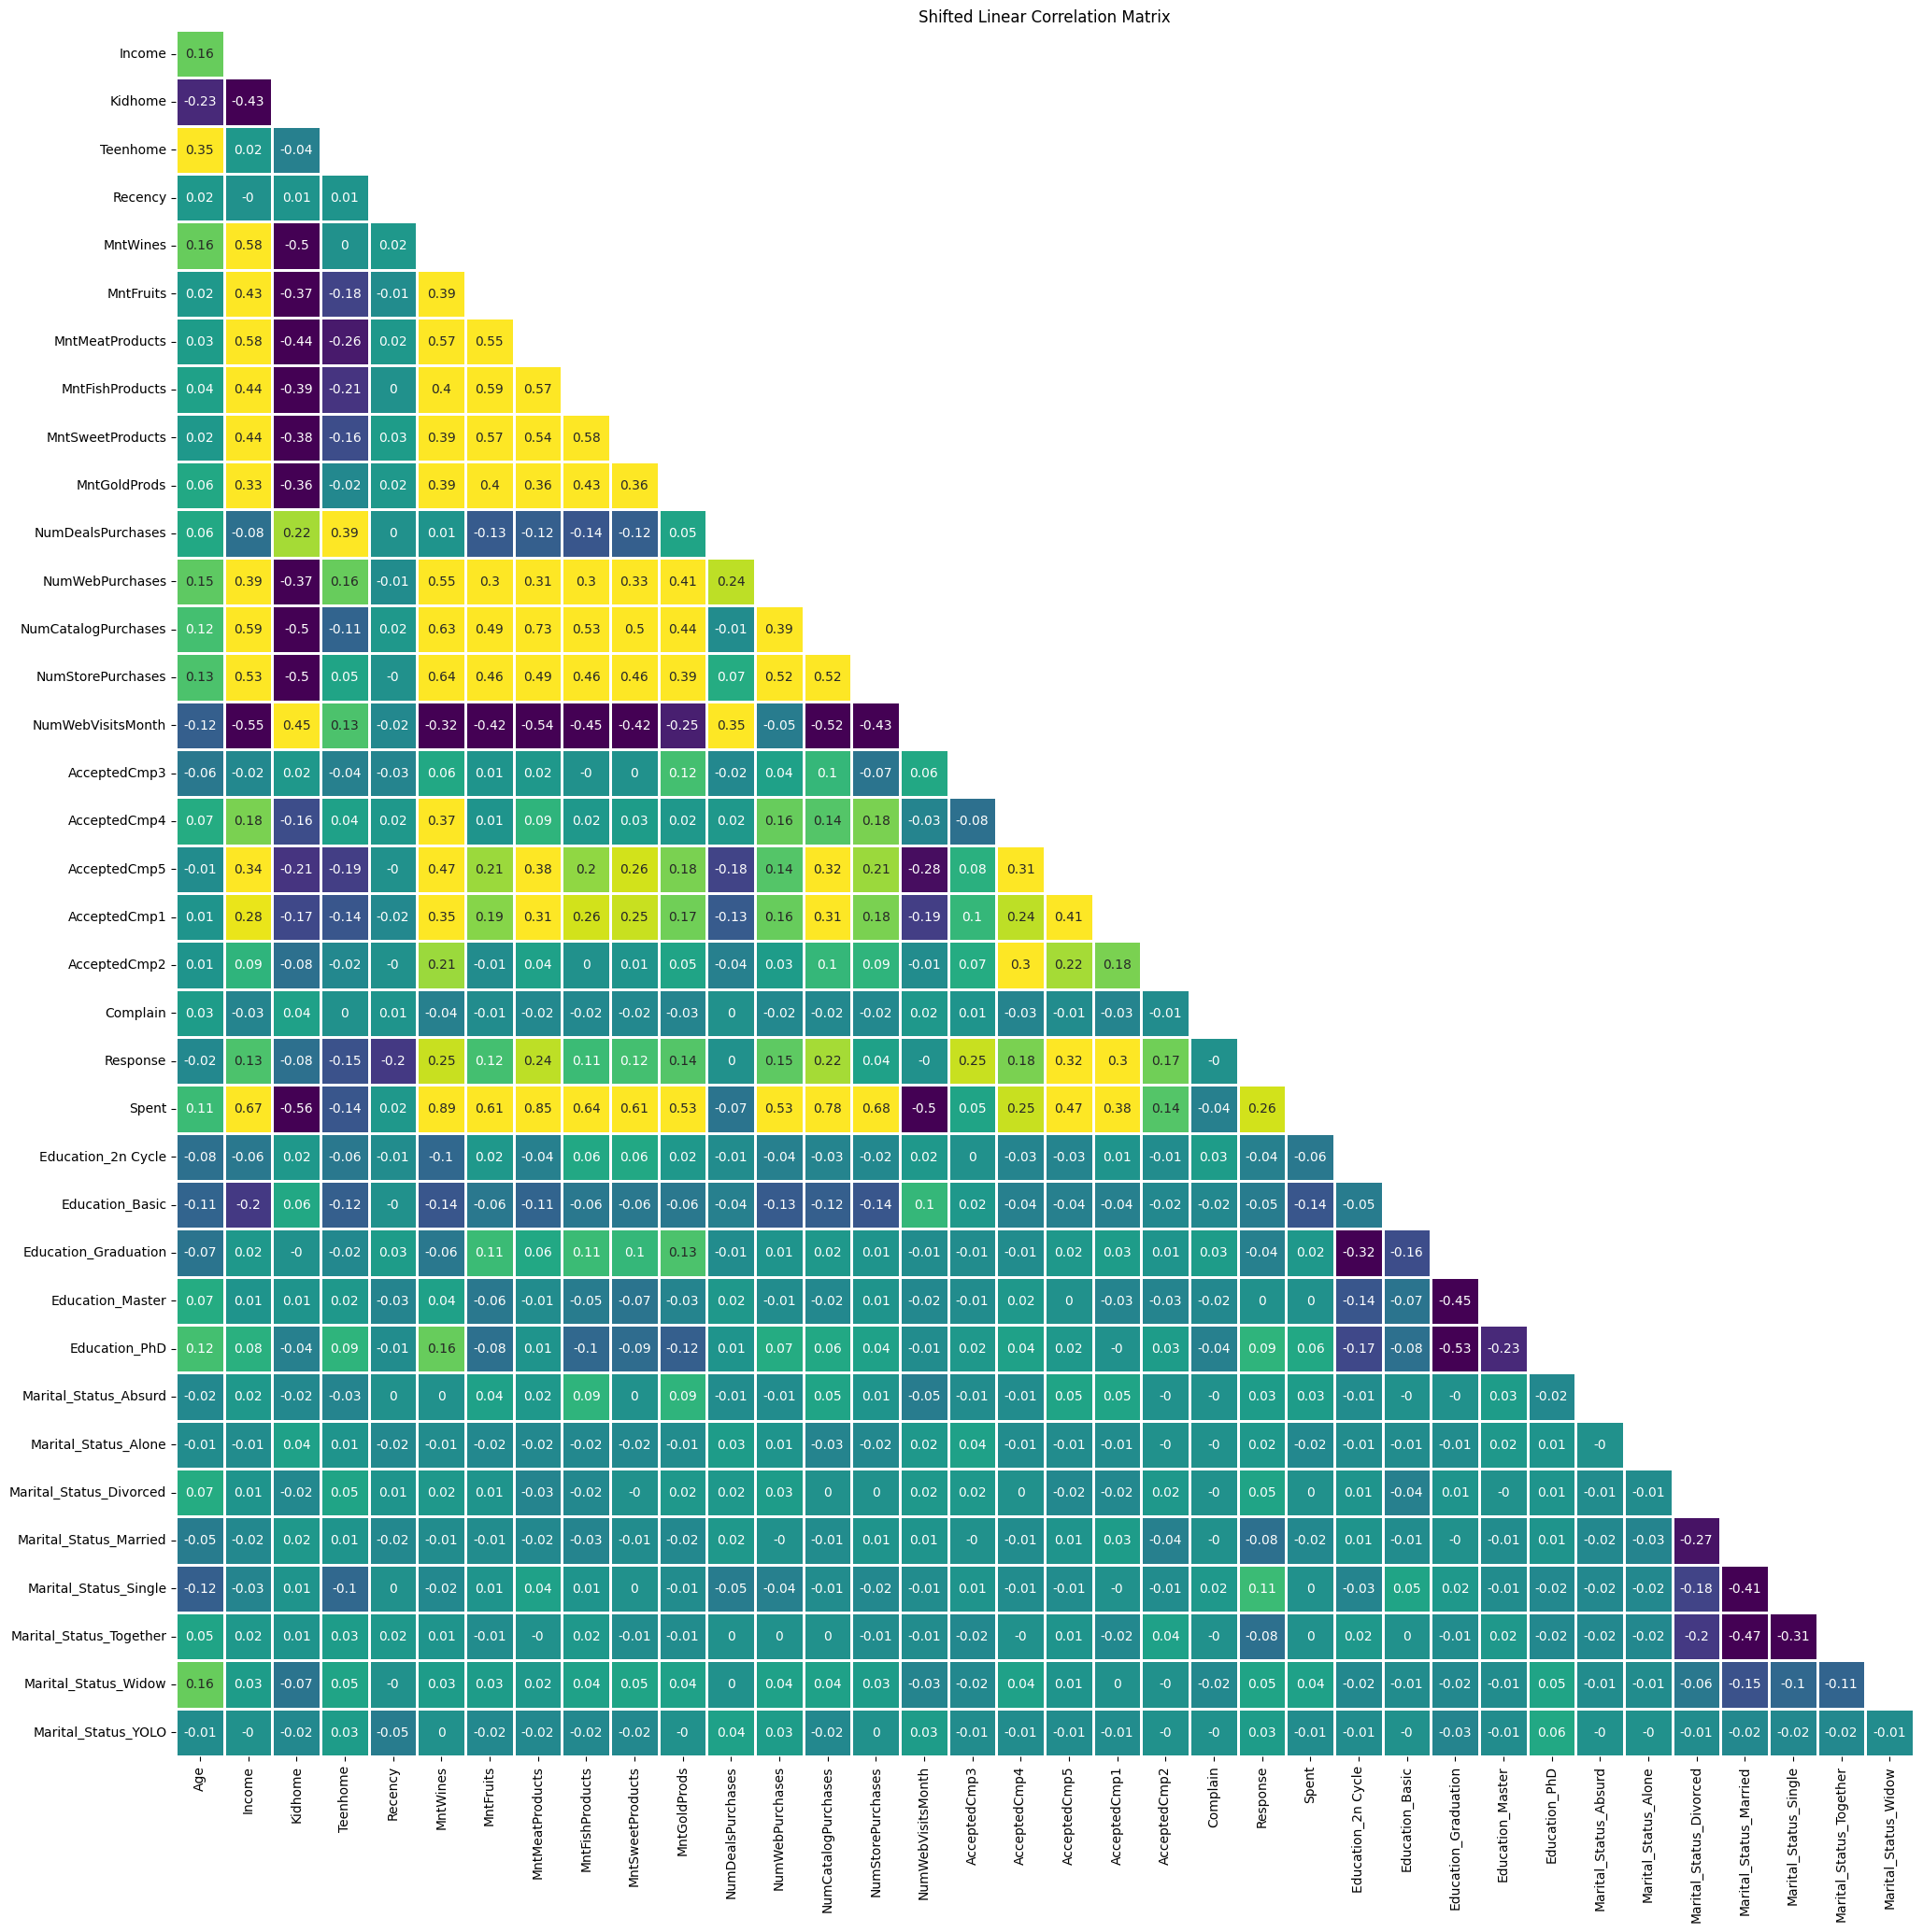

In [13]:
''' Plot a Shifted Correlation Matrix '''
# Diagonal correlation is always unity & less relevant, shifted variant shows only relevant cases
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(24,24))
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    mask = mask[1:,:-1]
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0, 
                cmap='viridis',square=False,lw=2,annot=True,cbar=False)
#     bottom, top = ax.get_ylim() 
#     ax.set_ylim(bottom + 0.5, top - 0.5) 
    ax.set_title('Shifted Linear Correlation Matrix')
    
corrMat(df)

# 4. Data transformation

In [14]:
df = pd.read_csv('./data/retrieved_data.csv')

In [15]:
class DataPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
  
    def transform(self, X):
        df_transformed = self.feature_generation(X)
        df_transformed = self.remove_outliers(df_transformed, 'Income')
        df_transformed = self.scaling_func(df_transformed)
        df_transformed = self.dim_reduction(df_transformed)
        return df_transformed

    def feature_generation(self,data: pd.DataFrame) -> pd.DataFrame:        
        """
        Generates and adds new features to the provided DataFrame.

        Parameters:
        data (pd.DataFrame): DataFrame containing the original data.

        Returns:
        pd.DataFrame: DataFrame with the generated and added features.
        """
        # Calculate client age
        data['Age'] = datetime.now().year - data['Year_Birth']  
        
        # Calculate number of years since customer registration
        registration_year = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y').apply(lambda x: x.year)
        current_year = datetime.now().year
        data['Years_Since_Registration'] = current_year - registration_year 

        # Encode Education
        data["Education"] = data["Education"].replace({"Basic": 0, "Graduation": 1, "2n Cycle": 2, "Master": 2, "PhD": 3})
        
        # Calculate total amount spent on products
        mnt_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
        data['Sum_Mnt'] = data[mnt_cols].sum(axis=1)
        
        # Calculate number of companies in which the client accepted the offer
        accepted_cmp_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
        data['Num_Accepted_Cmp'] = data[accepted_cmp_cols].sum(axis=1)

        # Calculate total number of purchases
        total_purchases = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
        data['Num_Total_Purchases'] = data[total_purchases].sum(axis=1)

        # Drop missing values and unnecessary columns
        data.dropna(inplace=True)
        data.drop(['Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer', 'Marital_Status'], axis=1, inplace=True)
    
        # Apply one-hot encoding for remaining categorical features
        data = pd.get_dummies(data)

        return data

    def remove_outliers(self,data: pd.DataFrame, column: str) -> pd.DataFrame:
        """
        Removes outliers from the specified column of the provided DataFrame.

        Parameters:
        data (pd.DataFrame): DataFrame containing the data.
        column (str): Name of the column to remove outliers from.

        Returns:
        pd.DataFrame: DataFrame with outliers removed from the specified column.

        Description:
        This function identifies and removes outliers from the specified column using the Interquartile Range (IQR) method.
        """
        q3, q1 = np.nanpercentile(data[column], [75, 25])
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]
        return data

    def scaling_func(self, data: pd.DataFrame) -> pd.DataFrame:
        """
        Applies Min-Max scaling to the provided DataFrame.

        Parameters:
        data (pd.DataFrame): DataFrame containing the data to be scaled.

        Returns:
        pd.DataFrame: DataFrame with Min-Max scaled values.

        Description:
        This function performs Min-Max scaling on the provided DataFrame to scale the features within a specified range.
        """
        mms = MinMaxScaler()
        return pd.DataFrame(data=mms.fit_transform(data), columns=data.columns)

    @staticmethod
    def dim_reduction(data: pd.DataFrame) -> pd.DataFrame:
        """
        Performs dimensionality reduction using Principal Component Analysis (PCA) on the provided DataFrame.

        Parameters:
        data (pd.DataFrame): DataFrame containing the data for dimensionality reduction.

        Returns:
        pd.DataFrame: DataFrame with reduced dimensions using PCA.

        Description:
        This function applies Principal Component Analysis (PCA) to reduce the dimensionality of the provided DataFrame.
        """
        n_components = 8
        pca = PCA(n_components=n_components, random_state=42)
        data = pd.DataFrame(pca.fit_transform(data), columns=[f'PC{i}' for i in range(1, n_components + 1)])
        return data

# 5. Model Training and Save


Saved KMeans model with 2 clusters to ./models/kmeans_2_clusters_model.pkl
Saved KMeans model with 3 clusters to ./models/kmeans_3_clusters_model.pkl
Saved KMeans model with 4 clusters to ./models/kmeans_4_clusters_model.pkl
Saved KMeans model with 5 clusters to ./models/kmeans_5_clusters_model.pkl
Saved KMeans model with 6 clusters to ./models/kmeans_6_clusters_model.pkl
Saved KMeans model with 7 clusters to ./models/kmeans_7_clusters_model.pkl
Saved KMeans model with 8 clusters to ./models/kmeans_8_clusters_model.pkl


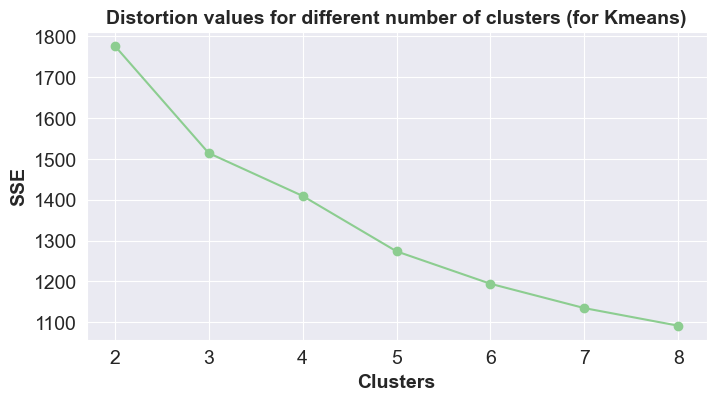

****************************************************************************************************************


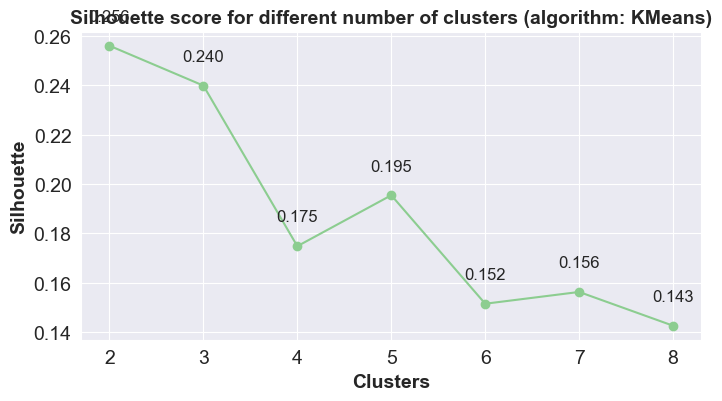

****************************************************************************************************************


In [16]:
class Clustering:
    """
    A class for performing KMeans clustering analysis and saving models.

    Attributes:
    min_n_clusters (int): Minimum number of clusters for analysis.
    max_n_clusters (int): Maximum number of clusters for analysis.
    kmeans_distortions (list): List to store model distortions for different hyperparameters (n_clusters).
    models_dir (str): Directory to save trained models.

    Methods:
    load_kmeans_model(self, n_clusters): Load a KMeans clustering model from a file.
    predict_clusters(self, data, n_clusters): Predict clusters using a loaded KMeans model.
    make_models(self, df_transform): Build KMeans clustering models and save them.
    save_kmeans_model(self, model, n_clusters): Save a trained KMeans model to a file.
    """
    min_n_clusters = 2
    max_n_clusters = 8
    kmeans_distortions = []  # Model distortions for different hyperparameters(n_clusters)
    models_dir = './models/'  # Directory to save models

    def __init__(self):
        if not os.path.exists(self.models_dir):
            os.makedirs(self.models_dir)

    def fit(self, data):
        return self 

    @staticmethod
    def sse_plot(): 
        """Graphs for the SSE values (KMeans)"""
        plt.figure(figsize=(8, 4))
        sns.set_style("darkgrid")
        plt.title('Distortion values for different number of clusters (for Kmeans)', fontsize=14, fontweight='bold')
        plt.xlabel('Clusters', fontsize=14, fontweight='bold')
        plt.ylabel('SSE',fontsize=14, fontweight='bold')
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.plot(list(range(Clustering.min_n_clusters, Clustering.max_n_clusters + 1)), Clustering.kmeans_distortions, marker='o')
        plt.show()

    @staticmethod
    def silhouette_result(metrics_score: list, algorithm: str) -> None:
        """
        Visualize the silhouette scores for different numbers of clusters using a line plot.

        Parameters:
        metrics_score (list): List of silhouette scores for different numbers of clusters.
        algorithm (str): Name of the clustering algorithm used.

        Returns:
        None

        Description:
        This static method creates a line plot to visualize the silhouette scores corresponding to different numbers of clusters.
        
        - 'metrics_score': List containing silhouette scores for different cluster configurations.
        - 'algorithm': Name of the clustering algorithm being evaluated.
        - Create a new figure and set the style to darkgrid using seaborn.
        - Set the plot title, x-axis label, and y-axis label with appropriate fonts.
        - Generate a line plot to show the silhouette scores against the number of clusters.
        - Annotate each point on the plot with its silhouette score value.
        - Display the plot.
        """
        plt.figure(figsize=(8, 4))
        sns.set_style("darkgrid")
        plt.title(f'Silhouette score for different number of clusters (algorithm: {algorithm})', fontsize=14, fontweight='bold')
        plt.xlabel('Clusters', fontsize=14, fontweight='bold')
        plt.ylabel('Silhouette', fontsize=14, fontweight='bold')
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        
        cluster_range = list(range(Clustering.min_n_clusters, Clustering.max_n_clusters + 1))
        plt.plot(cluster_range, metrics_score, marker='o')

        for i, score in enumerate(metrics_score):
            plt.text(cluster_range[i], score + 0.01, f'{score:.3f}', ha='center', fontsize=12)
        
        plt.show()
        print('*' * 112)

    def save_kmeans_model(self, model, n_clusters) -> None:
        """
        Save the trained KMeans clustering model to a file.

        Parameters:
        model: Trained KMeans model to be saved.
        n_clusters (int): Number of clusters in the model.

        Returns:
        None

        Description:
        This method saves the trained KMeans clustering model to a file in the specified models directory.

        - 'model': Trained KMeans model to be saved.
        - 'n_clusters': Number of clusters associated with the model.
        - 'model_filename': Generate a filename for the model based on the number of clusters.
        - Save the KMeans model using the joblib.dump function.
        - Print a confirmation message indicating the successful saving of the model.
        """
        model_filename = f"{self.models_dir}kmeans_{n_clusters}_clusters_model.pkl"
        joblib.dump(model, model_filename)
        print(f"Saved KMeans model with {n_clusters} clusters to {model_filename}")

          
    def make_models(self, df_transform: pd.DataFrame) -> None:
        """
        Build KMeans clustering models for various numbers of clusters and save the models.

        Parameters:
        df_transform (pd.DataFrame): DataFrame with transformed data for clustering.

        Returns:
        None

        Description:
        This method constructs KMeans clustering models with varying numbers of clusters
        and evaluates the models using the silhouette score. It also saves the KMeans models
        for future use.

        - 'df_transform': DataFrame containing the transformed data for clustering.
        - 'metrics': A list to store silhouette scores for different numbers of clusters.
        - Iterate through a range of cluster numbers from 'min_n_clusters' to 'max_n_clusters'.
        - Create a KMeans model with the specified number of clusters and fit it to the transformed data.
        - Calculate the silhouette score for the current model and data.
        - Save the inertia (distortion) of the KMeans model for later use.
        - Save the trained KMeans model using the 'save_kmeans_model' method.
        """
        metrics = []  # metrics: silhouette score
        for n_clusters in range(Clustering.min_n_clusters, Clustering.max_n_clusters + 1):
            kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init=10, max_iter=280, random_state=42)
            pred = kmeans.fit_predict(df_transform)
            labels = pd.DataFrame(pred, columns=['Labels'], index=df_transform.index)
            metrics.append(silhouette_score(df_transform, labels))
            Clustering.kmeans_distortions.append(kmeans.inertia_)
            self.save_kmeans_model(kmeans, n_clusters)  # Save KMeans model

        
        Clustering.sse_plot()
        print('*' * 112)
        Clustering.silhouette_result(metrics, 'KMeans')


data_transformer = DataPreprocessor()
clustering = Clustering()

pipeline = Pipeline([
    ('data_transformer', data_transformer),
])

df_transform = pipeline.fit_transform(df)

clustering = Clustering()
clustering.make_models(df_transform)

# 6. Load and predict data.

In [17]:
class LoadAndPredict:
    """
    A class for loading KMeans clustering models and predicting clusters.

    Attributes:
    models_dir (str): Directory path for saving and loading models.

    Methods:
    load_kmeans_model(self, n_clusters): Load a KMeans clustering model.
    predict_clusters(self, data, n_clusters): Predict clusters using a loaded KMeans model.
    """
    models_dir = './models/'

    def load_kmeans_model(self, n_clusters):
        """
        Load a KMeans clustering model from a file.

        Parameters:
        n_clusters (int): Number of clusters associated with the model.

        Returns:
        KMeans: Loaded KMeans model.

        Description:
        This method loads a previously saved KMeans clustering model from a file.

        - 'n_clusters': Number of clusters associated with the model.
        - 'model_filename': Generate the filename for the model based on the number of clusters.
        - Load the KMeans model using joblib.load and return it.
        """
        model_filename = f"{self.models_dir}kmeans_{n_clusters}_clusters_model.pkl"
        return joblib.load(model_filename)

    def predict_clusters(self, data, n_clusters):
        """
        Predict clusters for new data using a loaded KMeans model.

        Parameters:
        data: Data for which clusters are to be predicted.
        n_clusters (int): Number of clusters associated with the model.

        Returns:
        np.ndarray: Predicted cluster labels.

        Description:
        This method predicts clusters for new data using a loaded KMeans model.

        - 'data': New data for cluster prediction.
        - 'n_clusters': Number of clusters associated with the model.
        - Load the KMeans model using 'load_kmeans_model' and predict clusters for the data.
        - Return the array of predicted cluster labels.
        """
        kmeans_model = self.load_kmeans_model(n_clusters)
        return kmeans_model.predict(data)

# Usage
if __name__ == "__main__":
    """
    Demonstration of using the Clustering class for prediction and preprocessing.

    Description:
    This part of the code showcases the usage of the Clustering class to predict clusters for new data
    and save the preprocessed data along with the predicted clusters to a new CSV file.

    - Create an instance of the Clustering class.
    - Load new data for prediction from a CSV file.
    - Perform data preprocessing steps using various functions, including data reduction and scaling.
    - Specify the number of clusters to predict.
    - Predict clusters for the new data using the 'predict_clusters' method.
    - Add the predicted cluster labels to the original DataFrame.
    - Save the preprocessed data with predicted clusters to a new CSV file.
    """
    LoadAndPredict = LoadAndPredict()

    # Load new data for prediction
    df = pd.read_csv("./data/retrieved_data.csv")  # Replace with your new data file

    # Prepare data
    df = DataPreprocessor.feature_generation('/',df)
    df = DataPreprocessor.remove_outliers('/', df,'Income')
    
    df_scaled = DataPreprocessor.scaling_func('/',df)
    df_scaled.index = df.index 
    
    df_transform = DataPreprocessor.dim_reduction(df_scaled)  # df: scaling + dimensionality reduction
    df_transform.index = df_scaled.index

    # Choose the number of clusters to predict
    n_clusters_to_predict = 4

    # Predict clusters for the new data
    df['Predicted_Cluster'] = LoadAndPredict.predict_clusters(df_transform, n_clusters_to_predict)
     
    # Save preprocessed data with predictions to a new CSV
    df.to_csv("data_with_predictions.csv", index=False)